<a href="https://colab.research.google.com/github/ayuksekdag/mockup/blob/main/generate_mockup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://towardsdatascience.com/generating-mock-sales-data-with-python-pandas-c904035782fe

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from random import shuffle

In [ ]:
store_codes = np.arange(1,10)
product_codes = np.arange(1,101)
date_range = pd.date_range(start = "2019-01-01", end = "2020-12-31", freq="D")

In [ ]:
index = pd.MultiIndex.from_product(
   [date_range, store_codes, product_codes],
   names = ["Date", "StoreCode", "ProductCode"]
)
sales = pd.DataFrame(index = index)
#sales.head()

In [ ]:
sales.reset_index(inplace=True)
sales.head()

,Date,StoreCode,ProductCode
0,2019-01-01,1,1
1,2019-01-01,1,2
2,2019-01-01,1,3
3,2019-01-01,1,4
4,2019-01-01,1,5


In [ ]:
store_groups = ["Small","Medium","Large"]*3
shuffle(store_groups)
stores = pd.DataFrame({
   "StoreCode": np.arange(1,10),
   "StoreGroup": store_groups
})
stores

,StoreCode,StoreGroup
0,1,Medium
1,2,Medium
2,3,Large
3,4,Small
4,5,Large
5,6,Medium
6,7,Large
7,8,Small
8,9,Small


In [ ]:
product_groups = ["A","B","C","D"] * 25
shuffle(product_groups)
products = pd.DataFrame({
   "ProductCode": np.arange(1,101),
   "ProductGroup": product_groups
})
products.head()

,ProductCode,ProductGroup
0,1,D
1,2,B
2,3,B
3,4,C
4,5,B


In [ ]:
sales = pd.merge(sales, stores, on="StoreCode", how="left")
sales = pd.merge(sales, products, on="ProductCode", how="left")
sales.head()

,Date,StoreCode,ProductCode,StoreGroup,ProductGroup
0,2019-01-01,1,1,Medium,D
1,2019-01-01,1,2,Medium,B
2,2019-01-01,1,3,Medium,B
3,2019-01-01,1,4,Medium,C
4,2019-01-01,1,5,Medium,B


In [ ]:
size = len(sales)
sales_amount = np.random.randint(0, 50, size=len(sales))
sales["SalesAmount"] = sales_amount
sales.head()

,Date,StoreCode,ProductCode,StoreGroup,ProductGroup,SalesAmount
0,2019-01-01,1,1,Medium,D,48
1,2019-01-01,1,2,Medium,B,23
2,2019-01-01,1,3,Medium,B,25
3,2019-01-01,1,4,Medium,C,34
4,2019-01-01,1,5,Medium,B,19


In [ ]:
sales.to_csv("/Users/ayuksekdag/Downloads/mock_sales.csv", header=True, index=False)

<AxesSubplot: xlabel='Date'>

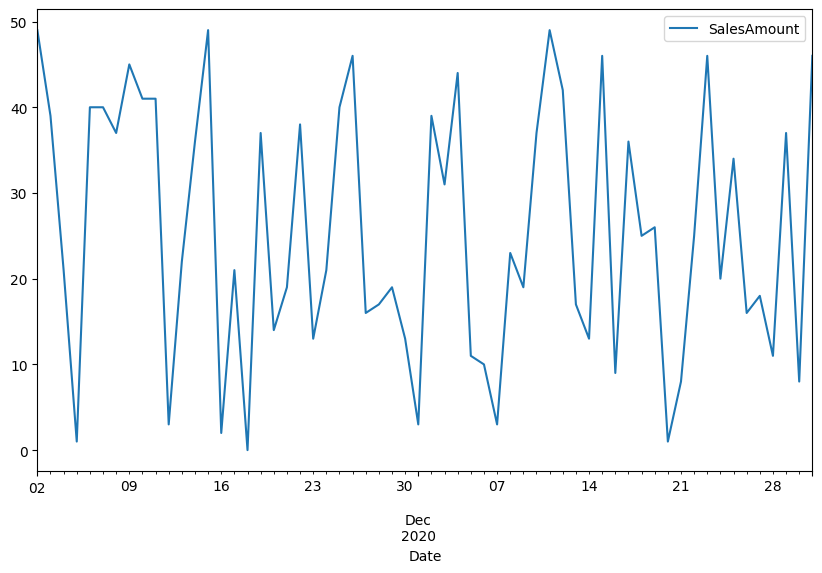

In [ ]:
sales[
     (sales.StoreCode==1) &
     (sales.ProductCode==5) &
     (sales.Date > "2020-11-01")
     ].plot(x="Date", y="SalesAmount", kind="line", figsize=(10,6))